In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np
from scipy.stats import norm, foldnorm
import pandas as pd
import statsmodels.formula.api as smf

In [37]:
df = pd.read_csv("dew-point-pitching/data.csv")
df['pk'] = df['PITCHER_KEY'].apply(lambda x: str(x))
df

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,...,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z,pk
0,197,1,1,1,0,0,0,0,0,0,...,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282,668881
1,348,1,2,1,1,0,0,0,0,0,...,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744,668881
2,1072,1,2,2,1,1,0,0,0,0,...,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833,668881
3,420,1,3,1,1,0,0,1,0,0,...,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319,668881
4,198,1,3,2,1,0,1,1,0,0,...,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222,668881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,22663,9,4,2,2,1,0,1,0,0,...,2139.620117,92.623001,-2.01709,6.18892,5.81,2.164890,-4.58267,0.750023,3.40322,643361
9885,28642,9,4,3,2,1,1,1,0,0,...,2104.620117,88.973701,-2.22191,6.09663,5.71,3.371970,-5.39125,0.872825,3.17087,643361
9886,22664,9,4,4,2,2,1,1,0,0,...,2142.620117,92.265297,-1.99639,6.21051,5.83,0.063614,-5.65863,-0.988207,2.56097,643361
9887,22665,9,4,5,2,2,2,1,0,0,...,1968.619995,84.541603,-2.25819,6.13594,5.60,0.865016,-6.89677,-0.278290,2.14642,643361


In [25]:
cols = ['THROW_SIDE_KEY', 'PITCH_TYPE_TRACKED_KEY', 'INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 'RELEASE_SIDE', 'RELEASE_HEIGHT', 'RELEASE_EXTENSION', 'HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE', 'PLATE_X', 'PLATE_Z']
data_cols = ['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 'RELEASE_SIDE', 'RELEASE_HEIGHT', 'RELEASE_EXTENSION', 'HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE', 'PLATE_X', 'PLATE_Z']
data_cols_w_inning = ['INNING_KEY', 'INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 'RELEASE_SIDE', 'RELEASE_HEIGHT', 'RELEASE_EXTENSION', 'HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE', 'PLATE_X', 'PLATE_Z']


In [90]:
pitch_types = df['PITCH_TYPE_TRACKED_KEY'].unique()
pitch_types

array(['FB', 'SL', 'UN', 'SF', 'SI', 'SW', 'CH', 'CB', 'CF', 'KN'],
      dtype=object)

In [122]:
# mask = (df['THROW_SIDE_KEY'] == 'R') & (df['PITCH_TYPE_TRACKED_KEY'] == 'SL')  & (df['PITCHER_KEY'] == 668881)
mask =  (df['PITCH_TYPE_TRACKED_KEY'] == 'SL') & (df['PITCHER_KEY'] == 668881)
specific_pitch = df[mask]
specific_pitch = pd.get_dummies(specific_pitch)
# mask
# specific_pitch = specific_pitch[data_cols]
len(specific_pitch)

218

In [ ]:
specific_pitch.corr()

In [ ]:
specific_pitch.corr()['HORIZONTAL_APPROACH_ANGLE'].sort_values(ascending=False)[1:]

In [ ]:
specific_pitch.corr()['PLATE_X'].sort_values(ascending=False)[1:]

In [118]:
pitchers = [f'pk_{i}' for i in specific_pitch['PITCHER_KEY'].unique()[:-1]]

x = specific_pitch[['HORIZONTAL_APPROACH_ANGLE', 'HORIZONTAL_BREAK', 'RELEASE_HEIGHT'] + pitchers]


y = specific_pitch['PLATE_X'].to_numpy()

x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 17 Oct 2023   Prob (F-statistic):                nan
Time:                        20:00:22   Log-Likelihood:                 102.77
No. Observations:                   3   AIC:                            -199.5
Df Residuals:                       0   BIC:                            -202.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/opt/miniconda3/envs/sci/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/miniconda3/envs/sci/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/miniconda3/envs/sci/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/miniconda3/envs/sci/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [101]:
diff = y - np.array(result.predict(x))
abs_diff = abs(diff)

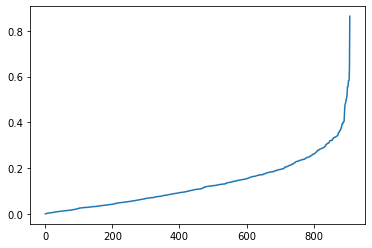

In [102]:
plt.plot([i for i in range(len(diff))], np.sort(abs_diff))

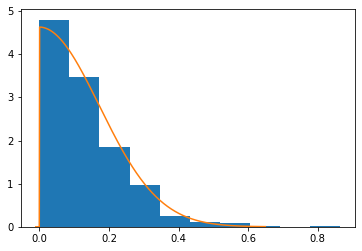

In [103]:
x_axis = np.arange(-.01, .65, 0.001)
plt.hist(abs_diff, density=True)
mu = np.mean(diff)
std = np.std(diff)
c = abs(mu) / std
plt.plot(x_axis, foldnorm.pdf(x_axis, c, mu, std))
plt.show()

In [85]:
probs = foldnorm.cdf(abs_diff, c, mu, std) - foldnorm.cdf(0, c, mu, std)

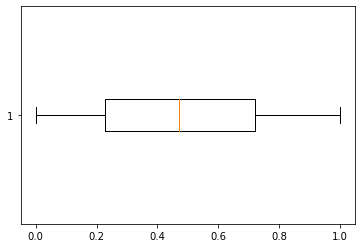

In [86]:
plt.boxplot(probs, vert=False)
plt.show()